In [1]:
from datetime import date, time, datetime, timedelta
import pandas as pd
import enphase as e
import matplotlib.pyplot as pyplot
import numpy as np
import pprint

In [2]:
#e.print_environ()
pp = pprint.PrettyPrinter(indent=4)
a_few_days_ago = e.today() - timedelta(days=2)
not_long_ago = e.today() - timedelta(days=14)

In [3]:
data = e.compute_data_frame(complete_days=False, start_date=a_few_days_ago)
e.augment_data_frame(data)
data_copy = data.copy()
data15 = e.compute_data_frame(complete_days=False, increment=15)
data60 = e.compute_data_frame(complete_days=False, increment=60)

/Users/electronhead/dev/data/enphase/stats_2021-03-14.csv
SUCCESS: 138 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-03-14.csv
/Users/electronhead/dev/data/enphase/stats_2021-03-15.csv
SUCCESS: 144 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-03-15.csv
/Users/electronhead/dev/data/enphase/stats_2021-03-16.csv
SUCCESS: 147 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-03-16.csv
{'dates_processed': 3, 'last_date_processed': datetime.date(2021, 3, 16)}
{'dates_processed': 0, 'last_date_processed': None}
{'dates_processed': 0, 'last_date_processed': None}


In [13]:
def slap(arg):
    print_glee = lambda glee: print(glee, '\n')
    if flea == 0: # PIVOT FORWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.f, start_date=not_long_ago, stop_date=e.today(), start_time=time(9,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 1: # PIVOT BACKWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.b, start_date=not_long_ago, stop_date=e.today(), start_time=time(9,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 2: # STATS
        glee = e.stats_by_time(data, column=e.wh, start_date=e.online_date(), stop_date=e.today())
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 3: # SUM BY TIME AND PLOT
        glee = data[[e.d,e.wh]].groupby([e.d]).sum()
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 4: # SUM RECENT WATT HOURS
        wh = e.by_date(data[[e.d,e.wh]], e.bom()+timedelta(days=3), e.today())
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 10: # SUM RECENT WATT HOURS minus ONE YEAR
        wh = e.by_date(data[[e.d,e.wh]], e.bom()-timedelta(days=365), e.today()-timedelta(days=365))
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 5: # PLOT YESTERDAY'S WATT HOURS
        glee = e.by_date(data, e.yesterday(), e.yesterday())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 6: # PLOT TODAY'S WATT HOURS
        glee = e.by_date(data, e.today(), e.today())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 7: # YESTERDAY'S RAW STATS
        pp.pprint(e.request_stats(e.yesterday()).json())
    elif flea == 8: # TODAY'S RAW STATS
        pp.pprint(e.request_stats(e.today()).json())
    elif flea == 9: # SUM OF PGE WATT HOURS FOR LAST TIME PERIOD
        date1 = date(2021,1,28)
        date2 = date(2021,2,25)
        glee = e.by_date(data, date1, date2)[e.wh].sum()
        print(f"{glee/1000} kWh for prior PGE billing period ({date1} to {date2})\n")

In [14]:
for flea in [4, 10]: #[9,4,0,1,3]:
    print('+++++++++++++++++')
    print('flea:', flea)
    print('+++++++++++++++++')
    slap(flea)

+++++++++++++++++
flea: 4
+++++++++++++++++
            watt_hours
date                  
2021-03-04       13300
2021-03-05        5239
2021-03-06       17729
2021-03-07       18592
2021-03-08       12663
2021-03-09       13963
2021-03-10       20799
2021-03-11       26321
2021-03-12       26651
2021-03-13       25142
2021-03-14        6000
2021-03-15       16465
2021-03-16       27993 

len         13
sum     230857
amin      5239
mean     17758
amax     27993
Name: watt_hours, dtype: int64 

+++++++++++++++++
flea: 10
+++++++++++++++++
            watt_hours
date                  
2020-03-04       19355
2020-03-05       19815
2020-03-06        6840
2020-03-07       12820
2020-03-08       20795
2020-03-09       23611
2020-03-10       26081
2020-03-11       21766
2020-03-12       27706
2020-03-13        7989
2020-03-14        5437
2020-03-15       29202
2020-03-16       29332 

len         13
sum     250749
amin      5437
mean     19288
amax     29332
Name: watt_hours, dtype: int64 



<AxesSubplot:xlabel='time'>

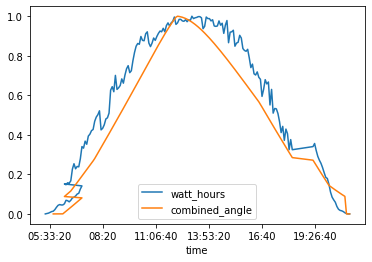

In [6]:
col = e.combined
angle_date = date(2020,6,21)
kwh = e.by_date(data, e.online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

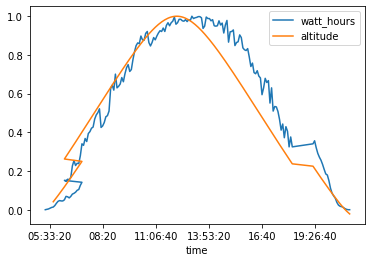

In [7]:
col = e.alt
angle_date = date(2020,6,21)
kwh = e.by_date(data, e.online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

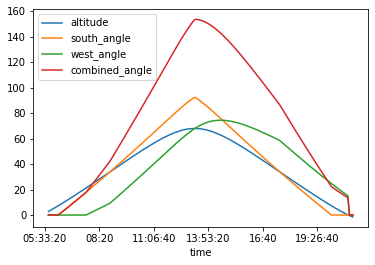

In [8]:
angle_date = date(2020,6,21)
angles = e.by_date(data, angle_date, angle_date)
angles[[e.t, e.alt, e.south, e.west, e.combined]].plot(x=e.t)

In [9]:
wh = pd.DataFrame(data.groupby(e.t)[e.wh].max(), columns=[e.wh])
angles = pd.DataFrame(e.by_date(data, date(2020,6,21), date(2020,6,21)).groupby(e.t)[e.combined].max(), columns=[e.combined])
joined = wh.join(angles, on=e.t)
joined.assign(factor=lambda x: x[e.wh] / x[e.combined])
print(wh)
print(angles)
print(joined.head(60))

                watt_hours
time                      
05:20:00-07:00           0
05:25:00-07:00           1
05:30:00-07:00           2
05:35:00-07:00           4
05:40:00-07:00           6
...                    ...
20:55:00-07:00           6
21:00:00-07:00           3
21:05:00-07:00           1
21:10:00-07:00           0
21:15:00-07:00           0

[192 rows x 1 columns]
                combined_angle
time                          
05:45:00-07:00        0.000000
05:50:00-07:00        0.000000
05:55:00-07:00        0.000000
06:00:00-07:00        0.000000
06:05:00-07:00        0.000000
...                        ...
20:55:00-07:00       14.414582
21:00:00-07:00       13.639740
21:05:00-07:00        0.000000
21:10:00-07:00        0.000000
21:15:00-07:00        0.000000

[187 rows x 1 columns]
                watt_hours  combined_angle
time                                      
05:20:00-07:00           0             NaN
05:25:00-07:00           1             NaN
05:30:00-07:00           2

In [10]:
angle_date = date(2020,6,21)
angles_sum = e.by_date(data, angle_date, angle_date)[[e.combined]].sum()
print(angles_sum)

combined_angle    14151.464813
dtype: float64


In [11]:
data.groupby(e.t)[e.wh].max().sum()

54707

In [12]:
data

,date,time,date_time,watts,watt_hours,forward,backward,peak,altitude,azimuth,south_angle,west_angle,combined_angle
0,2020-03-04,06:20:00-08:00,2020-03-04 06:20:00-08:00,1,0,0,19355,0,-15.221715,83.163769,0.000000,0.000000,0.000000
1,2020-03-04,06:25:00-08:00,2020-03-04 06:25:00-08:00,1,0,0,19355,0,-14.349959,84.080237,0.000000,0.000000,0.000000
2,2020-03-04,06:30:00-08:00,2020-03-04 06:30:00-08:00,1,0,0,19355,0,-13.476764,84.991684,0.000000,0.000000,0.000000
3,2020-03-04,06:35:00-08:00,2020-03-04 06:35:00-08:00,1,0,0,19355,0,-12.602355,85.898576,0.000000,0.000000,0.000000
4,2020-03-04,06:40:00-08:00,2020-03-04 06:40:00-08:00,1,0,0,19355,0,-11.726956,86.801391,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55092,2021-03-16,19:10:00-07:00,2021-03-16 19:10:00-07:00,77,6,27987,12,0,1.008108,267.503703,1.691104,24.949431,24.145591
55093,2021-03-16,19:15:00-07:00,2021-03-16 19:15:00-07:00,46,4,27991,6,0,0.248841,268.396573,0.687545,24.434456,22.678555
55094,2021-03-16,19:20:00-07:00,2021-03-16 19:20:00-07:00,21,2,27993,2,0,-0.463407,269.289087,0.000000,0.000000,0.000000
55095,2021-03-16,19:25:00-07:00,2021-03-16 19:25:00-07:00,4,0,27993,0,0,-1.119167,270.181738,0.000000,0.000000,0.000000
